In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = '/content/drive/Shareddrives/DataMiningProject'

# **Deep Neural Network Classifier**

In [ ]:
import os
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline
#from tqdm import tqdm_notebook as tqdm
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, LeakyReLU
from keras import backend
from keras.callbacks import ModelCheckpoint
from keras.regularizers import l2
from keras.models import load_model

import sklearn
from sklearn.metrics import mean_squared_error

In [ ]:
# datasets_path = os.path.join(path, 'datasets')

In [ ]:
X_train = np.loadtxt(os.path.join(path,'X_train.out'), delimiter=',')  # last column is rating

In [ ]:
X_test = np.loadtxt(os.path.join(path,'X_test.out'), delimiter=',')

In [ ]:
X_val = np.loadtxt(os.path.join(path,'X_val.out'), delimiter=',')

In [ ]:
y_train = np.loadtxt(os.path.join(path,'y_train.out'), delimiter=',')

In [ ]:
y_val = np.loadtxt(os.path.join(path,'y_val.out'), delimiter=',')

In [ ]:
X_train.shape, X_test.shape, X_val.shape, y_train.shape, y_val.shape

((46104, 902), (61538, 902), (35918, 924), (250874,), (35918,))

In [ ]:
backend.clear_session()

In [ ]:
nodes = 924
model = Sequential()
model.add(Dense(nodes, input_dim=X_train.shape[1],activation='relu'))
#model.add(LeakyReLU())
model.add(Dropout(0.25))


model.add(Dense(nodes,kernel_regularizer=l2(0.01), activation='relu'))
#model.add(Dense(nodes, activation='relu'))
model.add(Dropout(0.25))

#model.add(Dense(nodes,kernel_regularizer=l2(0.01), activation='relu'))
#model.add(Dense(nodes, activation='relu'))
#model.add(Dropout(0.25))



model.add(Dense(nodes,kernel_regularizer=l2(0.01), activation='relu'))
#model.add(Dense(nodes, activation='relu'))
model.add(Dropout(0.25))


model.add(Dense(1, activation='sigmoid'))

          
#model.compile(loss='mse',optimizer='rmsprop',metrics=['mse', 'mae', 'mape', 'cosine'])

#model.compile(optimizer='adam', 
 #             loss='binary_crossentropy', 
 #             metrics=['accuracy'])

model.compile(optimizer='adam',loss='mse',metrics=['mse'])

In [ ]:
for m in model.layers:
    print(m.name, m.input_shape,'---->',m.output_shape)

print(model.summary())

dense_2 (None, 902) ----> (None, 924)
dropout_1 (None, 924) ----> (None, 924)
dense_3 (None, 924) ----> (None, 924)
dropout_2 (None, 924) ----> (None, 924)
dense_4 (None, 924) ----> (None, 924)
dropout_3 (None, 924) ----> (None, 924)
dense_5 (None, 924) ----> (None, 1)
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 924)               834372    
                                                                 
 dropout_1 (Dropout)         (None, 924)               0         
                                                                 
 dense_3 (Dense)             (None, 924)               854700    
                                                                 
 dropout_2 (Dropout)         (None, 924)               0         
                                                                 
 dense_4 (Dense)             (None, 924)        

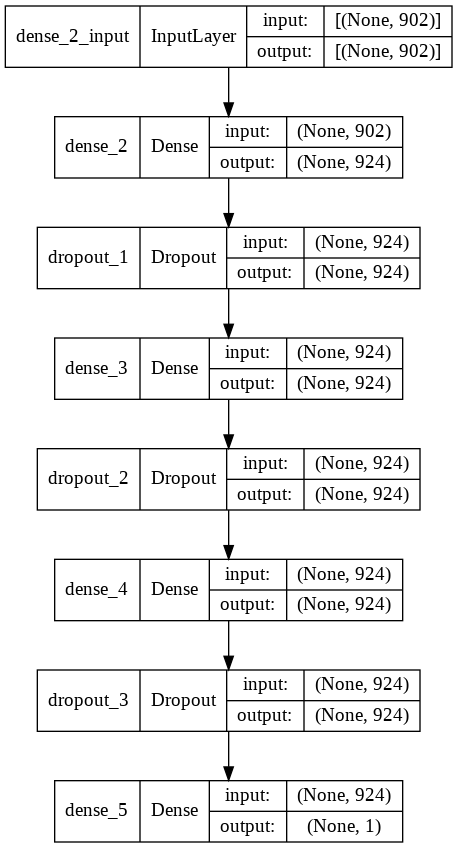

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model,to_file='model_dnn.png', show_shapes=True, show_layer_names=True)

In [ ]:
#filepath="epoch-{epoch:02d}-{val_loss:.4f}.hdf5"
#checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1,save_best_only=False, mode='auto', period=1)
# history= model.fit(X_train, y_train, batch_size=200, epochs=12, verbose=2,validation_data = [X_val,y_val])#,callbacks=[checkpoint])

Epoch 1/12
676/676 - 8s - loss: 0.6264 - mse: 0.1831 - val_loss: 0.1809 - val_mse: 0.1758 - 8s/epoch - 12ms/step
Epoch 2/12
676/676 - 4s - loss: 0.1784 - mse: 0.1729 - val_loss: 0.1806 - val_mse: 0.1760 - 4s/epoch - 6ms/step
Epoch 3/12
676/676 - 4s - loss: 0.1735 - mse: 0.1666 - val_loss: 0.1775 - val_mse: 0.1706 - 4s/epoch - 6ms/step
Epoch 4/12
676/676 - 5s - loss: 0.1650 - mse: 0.1532 - val_loss: 0.1741 - val_mse: 0.1611 - 5s/epoch - 7ms/step
Epoch 5/12
676/676 - 4s - loss: 0.1494 - mse: 0.1325 - val_loss: 0.1717 - val_mse: 0.1547 - 4s/epoch - 6ms/step
Epoch 6/12
676/676 - 4s - loss: 0.1324 - mse: 0.1121 - val_loss: 0.1750 - val_mse: 0.1552 - 4s/epoch - 6ms/step
Epoch 7/12
676/676 - 5s - loss: 0.1172 - mse: 0.0953 - val_loss: 0.1768 - val_mse: 0.1562 - 5s/epoch - 7ms/step
Epoch 8/12
676/676 - 5s - loss: 0.1041 - mse: 0.0812 - val_loss: 0.1845 - val_mse: 0.1612 - 5s/epoch - 7ms/step
Epoch 9/12
676/676 - 4s - loss: 0.0932 - mse: 0.0699 - val_loss: 0.1848 - val_mse: 0.1635 - 4s/epoch - 

In [ ]:
model.save(os.path.join(path, 'dnn_checkpoint'))

INFO:tensorflow:Assets written to: /content/drive/Shareddrives/DataMiningProject/dnn_checkpoint/assets


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer


In [ ]:
train_data = '/content/drive/Shareddrives/DataMiningProject/datasets/train.csv'
train = pd.read_csv(train_data)


In [ ]:
tf = TfidfVectorizer(binary = False, ngram_range = (1,2), stop_words = 'english',min_df=0.01,max_df=0.3)
train_corpus = train['review']
train_tfidf = tf.fit_transform(train_corpus)


In [ ]:
test_data = '/content/drive/Shareddrives/DataMiningProject/datasets/filtered.csv'
filt = pd.read_csv(test_data)
filt = filt.dropna()
filt_corpus=filt['review']
filt_tfidf=tf.transform(filt_corpus.values.astype('U'))
filt_features=filt_tfidf.toarray()
filt_features.shape

(10, 923)

In [ ]:
X_filt=np.c_[filt_features,filt['rating'].values/5]
y_filt = filt['label'].values


In [ ]:
model = load_model(os.path.join(path, 'dnn_checkpoint'))

findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


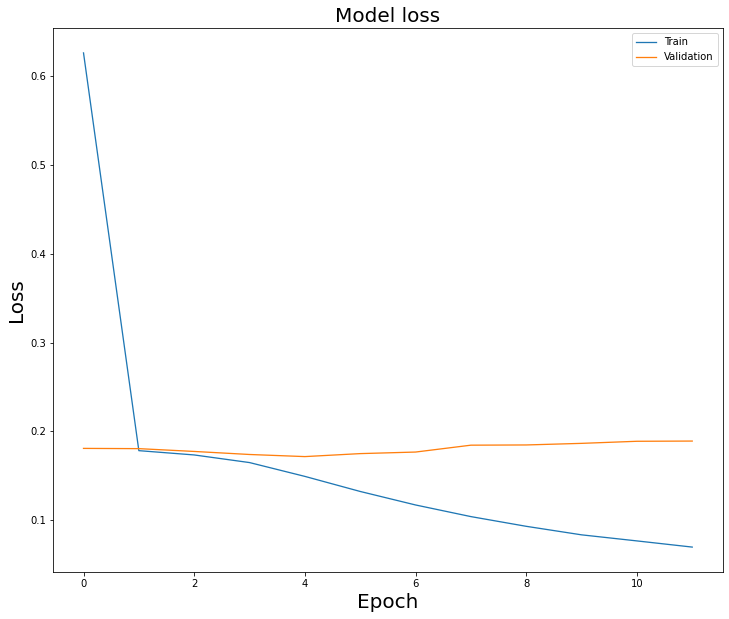

In [ ]:
plt.figure(figsize=(12 ,10))
plt.plot(history.history['loss'],linewidth=1.3)
plt.plot(history.history['val_loss'],linewidth=1.3)
plt.title('Model loss',fontsize=20,fontname='Times New Roman')
plt.ylabel('Loss',fontsize=20,fontname='Times New Roman')
plt.xlabel('Epoch',fontsize=20,fontname='Times New Roman')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [ ]:
probs_val = model.predict(X_val)
probs_val = np.squeeze(probs_val)

In [ ]:
pred = model.predict(X_filt)

binary_predictions = []

for i in pred:
    if i >= 0.5:
        binary_predictions.append(1)
    else:
        binary_predictions.append(0)


In [ ]:
binary_predictions

[0, 1, 0, 0, 0, 0, 0, 0, 0, 0]

In [ ]:
probs_val[0:10]

array([6.3754059e-02, 3.0232841e-01, 6.5664072e-03, 2.9309801e-04,
       1.5175910e-03, 5.0565940e-01, 2.8559288e-01, 6.2002406e-02,
       5.9696231e-02, 1.5220717e-01], dtype=float32)

In [ ]:
from sklearn import metrics

from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import average_precision_score

In [ ]:
fpr_w,tpr_w,threshold_w = metrics.roc_curve(y_val, probs_val)
auc_w = metrics.auc(fpr_w,tpr_w)
auc_w

0.8042671161236503

In [ ]:
ap=average_precision_score(y_val, probs_val)
ap

0.7485814345296418

In [ ]:
#Training AUC check for overfitting
p = model.predict(X_train)  # probability for label=1
p=np.squeeze(p)
f,t,thres = metrics.roc_curve(y_train, p)
auc_train = metrics.auc(f,t)
auc_train

0.984417353434864

In [ ]:
filt = pd.read_csv('datasets/filtered.csv')

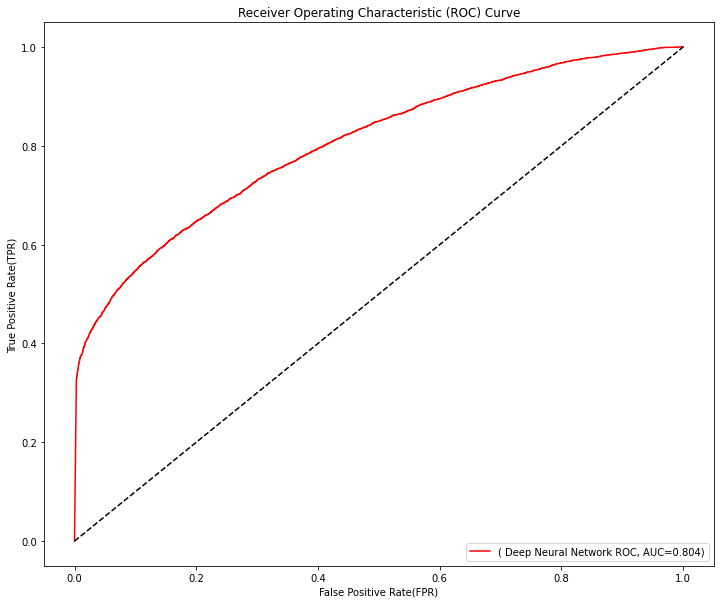

In [ ]:
plt.figure(figsize=(12 ,10))
#plt.plot(fpr, tpr, color='red', label='( ROC_LR, AUC=%0.3f)'%auc)
plt.plot(fpr_w, tpr_w, color='Red', label='( Deep Neural Network ROC, AUC=%0.3f)'%auc_w)

plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('False Positive Rate(FPR)')
plt.ylabel('True Positive Rate(TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc=4) #4:lower right legend

In [ ]:
X_test.shape

(72165, 924)

In [ ]:
probs_test = model.predict(X_test)
probs_test = np.squeeze(probs_test)

In [ ]:
np.savetxt(os.path.join(path,'predictions.csv'), probs_test)

# **RNN Classifier**

In [ ]:
from sklearn.model_selection import train_test_split
import re
from tensorflow.keras.preprocessing.text import Tokenizer


In [ ]:
import tensorflow as tf


In [ ]:
max_vocab = 10000
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(max_vocab, 32),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,  return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(16)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1)
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          320000    
                                                                 
 bidirectional (Bidirectiona  (None, None, 128)        49664     
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 32)               18560     
 nal)                                                            
                                                                 
 dense (Dense)               (None, 64)                2112      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 6

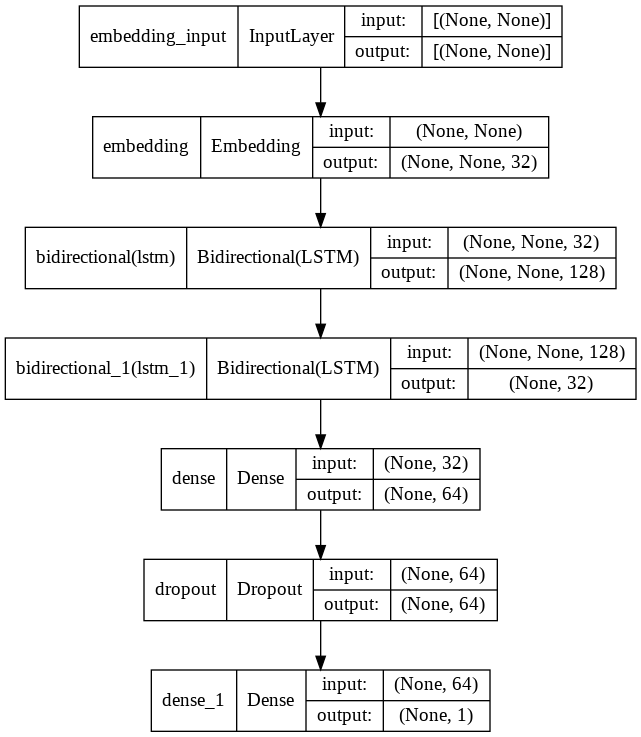

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_rnn.png',show_shapes=True, show_layer_names=True)

In [ ]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

history= model.fit(X_train, y_train, batch_size=200, epochs=12, verbose=1,validation_data = [X_val,y_val])#,callbacks=[early_stop], shuffle=True)

# history = model.fit(X_train, y_train, epochs=10,validation_split=0.1, batch_size=30, shuffle=True, callbacks=[early_stop])

Epoch 1/12
676/676 [==============================] - 3465s 5s/step - loss: 0.6389 - accuracy: 0.6667 - val_loss: 0.6351 - val_accuracy: 0.6667
Epoch 2/12
676/676 [==============================] - 3454s 5s/step - loss: 0.6373 - accuracy: 0.6667 - val_loss: 0.6347 - val_accuracy: 0.6667
Epoch 3/12
676/676 [==============================] - 3457s 5s/step - loss: 0.6370 - accuracy: 0.6667 - val_loss: 0.6351 - val_accuracy: 0.6667
Epoch 4/12
676/676 [==============================] - 3459s 5s/step - loss: 0.6368 - accuracy: 0.6667 - val_loss: 0.6346 - val_accuracy: 0.6667
Epoch 5/12
676/676 [==============================] - 3512s 5s/step - loss: 0.6368 - accuracy: 0.6667 - val_loss: 0.6345 - val_accuracy: 0.6667
Epoch 6/12
676/676 [==============================] - 3471s 5s/step - loss: 0.6366 - accuracy: 0.6667 - val_loss: 0.6345 - val_accuracy: 0.6667
Epoch 7/12
676/676 [==============================] - 3471s 5s/step - loss: 0.6366 - accuracy: 0.6667 - val_loss: 0.6347 - val_accuracy:

In [ ]:
path = '/content/drive/Shareddrives/DataMiningProject'
model.save(os.path.join(path, 'Bi-LSTM'))

In [ ]:
def normalize(data):
    normalized = []
    for i in data:
        i = i.lower()
        # get rid of urls
        i = re.sub('https?://\S+|www\.\S+', '', i)
        # get rid of non words and extra spaces
        i = re.sub('\\W', ' ', i)
        i = re.sub('\n', '', i)
        i = re.sub(' +', ' ', i)
        i = re.sub('^ ', '', i)
        i = re.sub(' $', '', i)
        normalized.append(i)
    return normalized

In [ ]:
train_data = '/content/drive/Shareddrives/DataMiningProject/datasets/train.csv'
test_data = '/content/drive/Shareddrives/DataMiningProject/datasets/dev.csv'
train = pd.read_csv(train_data)
test = pd.read_csv(test_data)
reviews = pd.concat([train, test], ignore_index=True, sort=False)
targets = reviews.pop('label')
features = reviews.pop('review')
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.20, random_state=18)
X_train = normalize(X_train)
X_test = normalize(X_test)

max_vocab = 10000
tokenizer = Tokenizer(num_words=max_vocab)
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

X_train = tf.keras.preprocessing.sequence.pad_sequences(X_train, padding='post', maxlen=256)
X_test = tf.keras.preprocessing.sequence.pad_sequences(X_test, padding='post', maxlen=256)

In [ ]:
test_data = '/content/drive/Shareddrives/DataMiningProject/datasets/filtered.csv'
reviews = pd.read_csv(test_data)
features = reviews.pop('review')
X_filt = normalize(features)
max_vocab = 10000
tokenizer = Tokenizer(num_words=max_vocab)
tokenizer.fit_on_texts(X_filt)

X_filt = tokenizer.texts_to_sequences(X_filt)

X_filt = tf.keras.preprocessing.sequence.pad_sequences(X_filt, padding='post', maxlen=256)

In [ ]:
model = load_model(os.path.join(path, 'LSTM_new'))

In [ ]:
history_dict = history.history

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = history.epoch

plt.figure(figsize=(12,9))
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss', size=20)
plt.xlabel('Epochs', size=20)
plt.ylabel('Loss', size=20)
plt.legend(prop={'size': 20})
plt.show()

plt.figure(figsize=(12,9))
plt.plot(epochs, acc, 'g', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy', size=20)
plt.xlabel('Epochs', size=20)
plt.ylabel('Accuracy', size=20)
plt.legend(prop={'size': 20})
plt.ylim((0.5,1))
plt.show()

In [ ]:
model.evaluate(X_test, y_test)

1793/1793 [==============================] - 162s 90ms/step - loss: 0.3042 - accuracy: 0.8945


[0.30417320132255554, 0.8944891095161438]

In [ ]:
pred = model.predict(X_filt)

binary_predictions = []

for i in pred:
    if i >= 0.5:
        binary_predictions.append(1)
    else:
        binary_predictions.append(0) 

In [ ]:
binary_predictions

[0, 1, 0, 0, 1, 0, 0, 0, 0, 1]

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score

In [ ]:
print('Accuracy on testing set:', accuracy_score(binary_predictions, y_test))
print('Precision on testing set:', precision_score(binary_predictions, y_test))
print('Recall on testing set:', recall_score(binary_predictions, y_test))

Accuracy on testing set: 0.8944890949981694
Precision on testing set: 0.0
Recall on testing set: 0.0


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
matrix = confusion_matrix(binary_predictions, y_test, normalize='all')
matrix

array([[0.89448909, 0.10551091],
       [0.        , 0.        ]])